In [21]:
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd


start_time = 1190146243
end_time = 1192994591

In [20]:
import pandas as pd

word_df = pd.read_csv("data/revisions/hot_10000.csv",delimiter='\t')
words_list = set(word_df['entry'])
access_timestamps = load_data("data/revisions/timestamps.pkl")

In [22]:
import pandas as pd
    
update_frequency = {}
access_frequency = {}

f = open("data/revisions/word-access-update-freq.csv", 'w')
f.write('entry\taccess\tupdate\n')
for word in words_list:
    try:
        revision = pd.read_csv("data/revisions/dump/{}.csv".format(word), delimiter='\t')
    except:
        import pdb
        pdb.set_trace()
        
    update_frequency[word] = len(revision)
    access_frequency[word] = len(access_timestamps[word])
    f.write("{}\t{}\t{}\n".format(word, len(access_timestamps[word]), len(revision)))
f.close()

> <ipython-input-22-10303e7a2c69>(15)<module>()
-> update_frequency[word] = len(revision)
(Pdb) q


BdbQuit: 

In [140]:
update_frequency

{'It%27s_a_Wonderful_World_%28video_game%29': 0,
 'Bugsy_Malone': 6,
 'Bathymetry': 13,
 'April_27': 36,
 'Solar_system': 0,
 'Guitar_solo': 15,
 'Kazoo': 13,
 'Red_Cafe': 0,
 'The_Bell_Curve': 30,
 'Tourism': 71,
 'Mercury_Seven': 4,
 'Hell%27s_Kitchen_%28US%29': 0,
 'Salem_Witch_Trials': 0,
 'Pseudalopex_griseus': 0,
 'Peter_Fechter': 0,
 'The_Walt_Disney_Company': 173,
 'Eva_Marcille': 17,
 'Psycho_III': 3,
 'Nicholas_Negroponte': 2,
 'Snowmobile': 37,
 'Clitoral_hood_piercing': 0,
 'Ltd': 0,
 'Windsor_knot': 2,
 'Skin': 46,
 'Shirley_Henderson': 3,
 'Disposition': 0,
 'Gold_coin': 1,
 'Peggy_Lee': 17,
 'List_of_number-one_singles_from_the_1980s_%28UK%29': 0,
 'Quagmire': 0,
 'Ky%C5%ABsh%C5%AB': 0,
 'Pneumonia': 58,
 'Thomas_Hobbes': 97,
 'Trotsky': 0,
 'The_Holiday_%28film%29': 0,
 'The_Waste_Lands': 0,
 'Everlast': 0,
 'List_of_simpsons_episodes': 0,
 'Master_of_Puppets': 60,
 'Faramir': 14,
 'Nathan_Bedford_Forrest': 26,
 'Justice_(French_band)': 0,
 'Head_Start': 0,
 'National_S

In [33]:
import matplotlib.pyplot as plt
import numpy as np
    
def plot_time_series(word, access_timestamps, revision_dump_path):
    access_times = np.sort(np.array(access_timestamps[word],dtype=float)) - start_time
    plt.figure(0)
    plt.step(access_times, range(1, len(access_times)+1))
    plt.xlim((0,end_time-start_time))
    
    revision = pd.read_csv("{}{}.csv".format(revision_dump_path,word), delimiter='\t')
    update_times = (revision['timestamp'] - start_time)[::-1]
    plt.figure(1)
    plt.step(update_times, range(1, len(update_times)+1))
    plt.xlim((0,end_time-start_time))
    
    sizes = revision['size'][::-1]
    plt.figure(2)
    plt.step(update_times, sizes)
    plt.xlim((0,end_time-start_time))
    
    plt.show()

plot_time_series('Zoo', access_timestamps, 'data/revisions/dump/')   

NameError: name 'access_timestamps' is not defined

# Hypothesis 1: Access frequency with Update frequency 

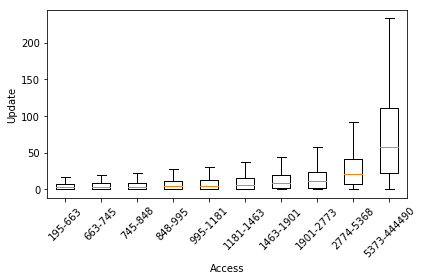

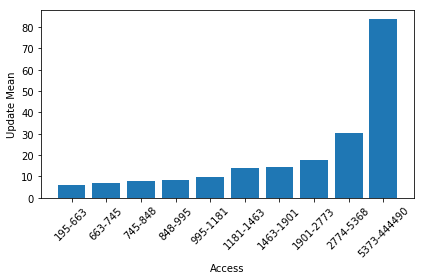

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

access_update = pd.read_csv("data/revisions/word-access-update-freq.csv", delimiter = "\t")

def update_sorted_by_access(word_df):
    tuples = word_df.apply(lambda row: (row['access'], row['update']), axis=1)
    return sorted(tuples, key = lambda x: x[0]) 
        
        
sort_list = update_sorted_by_access(access_update)

fig = plt.figure()
data = []
xlabels = []
for j in range(10):
    update = list(map(lambda x: x[1], sort_list[j * 1000: (j+1) * 1000]))
    access = list(map(lambda x: x[0], sort_list[j * 1000: (j+1) * 1000]))
    data.append(update)
    xlabels.append("{}-{}".format(min(access), max(access)))
plt.boxplot(data,0, '')
plt.xticks(range(1,11), xlabels)
plt.ylabel("Update")
plt.xlabel("Access")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.tight_layout()
plt.show()
fig.savefig("plots/access-update-boxplot.png", dpi=400)

fig = plt.figure()
data = []
xlabels = []
for j in range(10):
    update = list(map(lambda x: x[1], sort_list[j * 1000: (j+1) * 1000]))
    access = list(map(lambda x: x[0], sort_list[j * 1000: (j+1) * 1000]))
    data.append(np.mean(update))
    xlabels.append("{}-{}".format(min(access), max(access)))
plt.bar(range(10),data)
plt.xticks(range(10), xlabels)
plt.ylabel("Update Mean")
plt.xlabel("Access")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.tight_layout()
plt.show()
fig.savefig("plots/access-update-meanplot.png", dpi=400)


# Hypothesis 2: # vandalism with access frequency

In [24]:
import numpy as np
import pandas as pd

def check_vandalism(word):
    revision = pd.read_csv("data/revisions/dump/{}.csv".format(word), delimiter='\t')
    revision = revision.set_index(revision['timestamp'])
    df = pd.DataFrame(columns=['vandal','restorer','recovery time'])
    timestamp = revision.index[::-1]
    for i in range(1, len(timestamp) - 1):
        before_size = revision.loc[timestamp[i-1]]['size']
        current_size = revision.loc[timestamp[i]]['size']
        after_size = revision.loc[timestamp[i+1]]['size']
        if current_size < 0.1 * min(after_size, before_size):
            df.loc[timestamp[i]] = {'vandal': revision.loc[timestamp[i]]['user'], 
                                    'restorer': revision.loc[timestamp[i+1]]['user'],
                                    'recovery time': timestamp[i+1] - timestamp[i]}
   
    return df
data = check_vandalism('Jaslene_Gonzalez')
print(data)


Empty DataFrame
Columns: [vandal, restorer, recovery time]
Index: []


# Hypothesis 3 : Deletion discovering times with frequency

# Hypothesis 4: # Recovery by ClueBot with access frequency